Notebook structure:
- 1. Importing libraries
- 2. Loading the dataset
- 3. Exploratory Data Analysis TODO Joao
- 4. Data Preprocessing TODO Joao
- 5. Model Training TODO Jorge
- 6. Model Evaluation TODO Jorge
- 8. Conclusion Todo

## 1. Importing libraries

In [651]:
import pandas as pd
import pandas_profiling
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn import preprocessing, tree, metrics, model_selection, linear_model
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

import datetime
import random


# Lois
from lois import lois_ds_report
%matplotlib inline

## 2. Loading the dataset

In [652]:
trainingData = pd.read_csv('data/training_data.csv')
testData = pd.read_csv('data/test_data.csv')

# Drop city name and avg_precipitation in both training and test data
trainingData.drop('avg_precipitation', axis=1, inplace=True)
trainingData.drop('city_name', axis=1, inplace=True)
testData.drop('avg_precipitation', axis=1, inplace=True)
testData.drop('city_name', axis=1, inplace=True)

### Ideias para análise de dados

Magnitude of delay / Delay in Seconds
Affected roads
Date and Time
Luminosity
Temperature, Pressure, Humidity, Wind, Rain
Incidents

1. The most affected road: You can group the data by the affected roads column and then use a pivot table or some other tool to find out which road has the highest number of incidents.

2. Relationship between weather conditions and incidents: You can use the temperature, pressure, humidity, wind, and rain columns to see if there is any relationship between these weather conditions and the number of incidents. For example, you might find that there are more incidents when it is raining or when the wind is strong.

3. Magnitude of delay and weather conditions: You can use the magnitude of delay/delay in seconds column and the weather condition columns (temperature, pressure, humidity, wind, and rain) to see if there is any relationship between the magnitude of delay and the weather conditions. For example, you might find that the magnitude of delay is higher when it is raining or when the wind is strong.

4. Time of day and incidents: You can use the date/time column to see if there are any trends in the number of incidents over the course of a day. For example, you might find that there are more incidents during rush hour or during the night.

5. Luminosity and incidents: You can use the luminosity column to see if there is any relationship between the level of light and the number of incidents. For example, you might find that there are more incidents in the dark.


a few more relations between X column and incidents.

## 3. Exploratory Data Analysis

╭─────────────────────────────────────────── Exploratory Data Anlysis ────────────────────────────────────────────╮
│                                                                                                                 │
╰──────────────────────────────────── EDA|simple| Suitable for data scientist ────────────────────────────────────╯

EDA
┗━━ Dataset Shape Analysis
    ┣━━ Dataset head
    ┣━━ General info 
    ┣━━ The target variable
    ┣━━ Number of rows and columns
    ┣━━ The different data types
    ┃   ┣━━ The sum of different variable type
    ┃   ┗━━ Visual representation of different variable type
    ┗━━ Analyze missing value
        ┣━━ The percentage of missing value in each columns
        ┣━━ The missing value counts
        ┗━━ Visual representation of missing value

╭──────────────────────────────────────────── DATASET SHAPE ANALYSIS ─────────────────────────────────────────────╮
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

-------------------- THE HEAD OF YOUR DATASET --------------------

Your dataset is too large ; only the first 8 columns will be display

                                                    The Dataset                                                    
┏━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━┓
┃ magnitude_of_… ┃ delay_in_se… ┃ affected_… ┃ record… ┃ lumi… ┃ avg_temper… ┃ avg_atm_pr… ┃ avg_hum… ┃ avg_wind… ┃
┡━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━┩
└────────────────┴──────────────┴────────────┴─────────┴───────┴─────────────┴─────────────┴──────────┴───────────┘

-------------------- SOME GENERAL INFO ABOUT YOUR DATASET --------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   magnitude_of_delay  5000 non-null   object 
 1   delay_in_seconds    5000 non-null   int64  
 2   affected_roads      4915 non-null   object 
 3   record_date         5000 non-null   object 
 4   luminosity          5000 non-null   object 
 5   avg_temperature     5000 non-null   float64
 6   avg_atm_pressure    5000 non-null   float64
 7   avg_humidity        5000 non-null   float64
 8   avg_wind_speed      5000 non-null   float64
 9   avg_rain            5000 non-null   object 
 10  incidents           5000 non-null   object 
dtypes: float64(4), int64(1), object(6)
memory usage: 429.8+ KB


-------------------- THE TARGET VARIABLE OF YOUR DATASET --------------------

╭───────────────────────────────────────╮
│ The Target variable is : 'incidents'  │
╰───────────────────────────────────────╯

-------------------- ROWS AND COLUMNS IN YOUR DATASET --------------------

╭─ Shape output ─╮
│ (5000, 11)     │
╰────────────────╯

╭────────────────────────────────────────────────╮
│ Your dataset contains 5000 Rows and 11 Columns │
╰────────────────────────────────────────────────╯

-------------------- THE DATA TYPES IN YOUR DATASET --------------------

╭─ Data types output ─╮
│ object     6        │
│ float64    4        │
│ int64      1        │
│ dtype: int64        │
╰─────────────────────╯

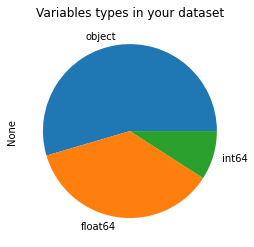

-------------------- MISSING VALUE IN YOUR DATASET --------------------

╭─── Missing value output ────╮
│ magnitude_of_delay    0.000 │
│ delay_in_seconds      0.000 │
│ record_date           0.000 │
│ luminosity            0.000 │
│ avg_temperature       0.000 │
│ avg_atm_pressure      0.000 │
│ avg_humidity          0.000 │
│ avg_wind_speed        0.000 │
│ avg_rain              0.000 │
│ incidents             0.000 │
│ affected_roads        0.017 │
│ dtype: float64              │
╰─────────────────────────────╯

╭─ Missing value counts output ─╮
│ 0.017     1                   │
│ 0.000    10                   │
│ dtype: int64                  │
╰───────────────────────────────╯

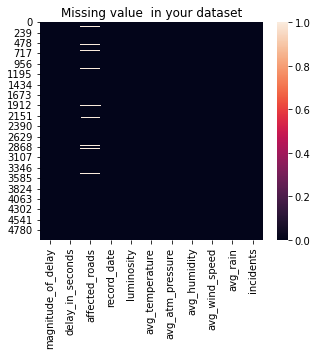

#################### END ####################

In [653]:
lois_ds_report(trainingData,target_variable="incidents")

In [654]:
trainingData.head()

,magnitude_of_delay,delay_in_seconds,affected_roads,record_date,luminosity,avg_temperature,avg_atm_pressure,avg_humidity,avg_wind_speed,avg_rain,incidents
0,UNDEFINED,0,",",2021-03-15 23:00,DARK,12.0,1013.0,70.0,1.0,Sem Chuva,None
1,UNDEFINED,385,"N101,",2021-12-25 18:00,DARK,12.0,1007.0,91.0,1.0,Sem Chuva,None
2,UNDEFINED,69,",",2021-03-12 15:00,LIGHT,14.0,1025.0,64.0,0.0,Sem Chuva,Low
3,MAJOR,2297,"N101,R206,N105,N101,N101,N101,N101,N101,N101,N...",2021-09-29 09:00,LIGHT,15.0,1028.0,75.0,1.0,Sem Chuva,Very_High
4,UNDEFINED,0,"N101,N101,N101,N101,N101,",2021-06-13 11:00,LIGHT,27.0,1020.0,52.0,1.0,Sem Chuva,High


In [655]:
trainingData.describe()

,delay_in_seconds,avg_temperature,avg_atm_pressure,avg_humidity,avg_wind_speed
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,560.567000,14.583000,1018.145000,74.455000,1.253500
std,1686.859581,4.820514,5.174372,17.204638,1.269847
min,0.000000,1.000000,997.000000,6.000000,0.000000
25%,0.000000,11.000000,1015.000000,63.000000,0.000000
50%,0.000000,14.000000,1019.000000,78.000000,1.000000
75%,234.000000,18.000000,1022.000000,90.000000,2.000000
max,31083.000000,35.000000,1032.000000,100.000000,10.000000


## 4. Data Preprocessing

### Look for any Duplicated Rows

In [656]:
# Is there any duplicated data?
print("Number of duplicated rows: {}".format(trainingData.duplicated().sum()))

Number of duplicated rows: 0


#### Handle Affected Roads

In [657]:
# Column affected_roads is a list of roads that are affected by the incident.
# Replace this column with the number of roads affected by the incident.
# Iterate over the number of affected roads of each incident.
def replace_affected_roads(data):
    
    for index, row in data.iterrows():
        # Check if the value is NaN
        split_roads = []
        if not pd.isnull(row['affected_roads']):
            split_roads = row['affected_roads'].split(',')
        
        # Remove empty strings
        split_roads = list(filter(None, split_roads))
        
        # Remove duplicates
        split_roads = list(dict.fromkeys(split_roads))
        
        data.at[index, 'affected_roads'] = len(split_roads)
        
    # Rename column
    data['affected_roads'] = data['affected_roads'].astype('int64')
    data.rename(columns={'affected_roads': 'number_of_affected_roads'}, inplace=True)
    
    return data

if 'affected_roads' in trainingData.columns:
    trainingData = replace_affected_roads(trainingData)
    testData = replace_affected_roads(testData)

### Handle Categorical data

In [658]:
# There are 5 non-numeric columns: magnitude_of_delay, record_date, luminosity, avg_rain and incidents
# See the different values of each column - exclude record_date, because it is a date (\:)
non_numeric_columns = ['magnitude_of_delay', 'luminosity', 'avg_rain', 'incidents']
for column in non_numeric_columns:
    print("Column: {}".format(column))
    unique_values_train = trainingData[column].unique()
    
    # Check if the column exists in the test data (incidents does not exist)
    if column in testData.columns:
        unique_values_test = testData[column].unique()
    else:
        unique_values_test = []
    
    # Merge the two arrays and remove duplicates
    unique_values = np.concatenate((unique_values_train, unique_values_test), axis=0)
    unique_values = np.unique(unique_values)
    print(unique_values)
    print("-----------------------------------------------------------------------") 

Column: magnitude_of_delay
['MAJOR' 'MODERATE' 'UNDEFINED']
-----------------------------------------------------------------------
Column: luminosity
['DARK' 'LIGHT' 'LOW_LIGHT']
-----------------------------------------------------------------------
Column: avg_rain
['Sem Chuva' 'chuva forte' 'chuva fraca' 'chuva moderada']
-----------------------------------------------------------------------
Column: incidents
['High' 'Low' 'Medium' 'None' 'Very_High']
-----------------------------------------------------------------------


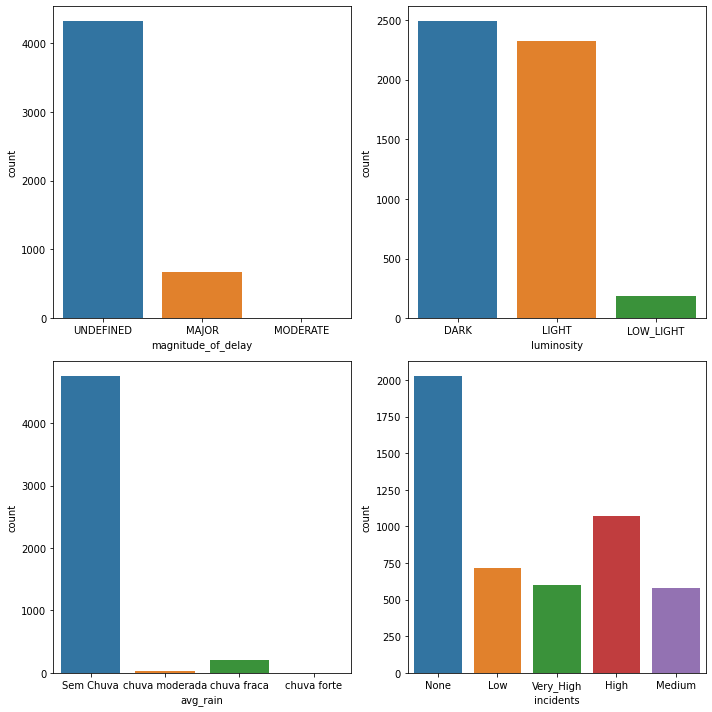

In [659]:
# Get the distribution of the non-numeric columns
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
for idx, column in enumerate(non_numeric_columns):
    sns.countplot(x=column, data=trainingData, ax=axes[idx // 2, idx % 2])
plt.tight_layout()
plt.show()

#### Magnitude of delay / Delay in Seconds

<AxesSubplot:xlabel='incidents', ylabel='count'>

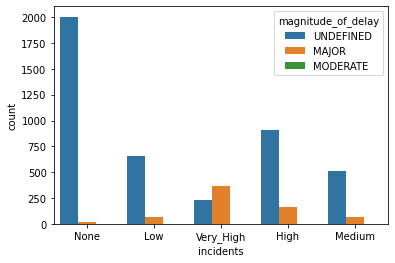

In [660]:
# Relation between "MAJOR" delays and the incidents
sns.countplot(x='incidents', hue='magnitude_of_delay', data=trainingData)

Number of UNDEFINED delays: 4314
Number of MAJOR delays: 678
Number of MODERATE delays: 8


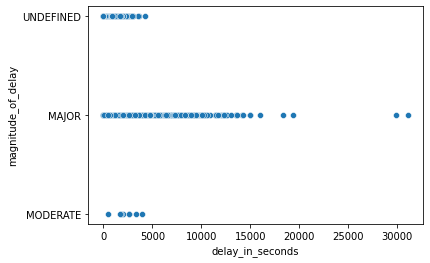

In [661]:
# Relation between magnitude of delay and delay in seconds
sns.scatterplot(x='delay_in_seconds', y='magnitude_of_delay', data=trainingData)

# Count the UNDIFINED, MAJOR and MODERATE delays
print("Number of UNDEFINED delays: {}".format(trainingData[trainingData['magnitude_of_delay'] == 'UNDEFINED'].shape[0]))
print("Number of MAJOR delays: {}".format(trainingData[trainingData['magnitude_of_delay'] == 'MAJOR'].shape[0]))
print("Number of MODERATE delays: {}".format(trainingData[trainingData['magnitude_of_delay'] == 'MODERATE'].shape[0]))

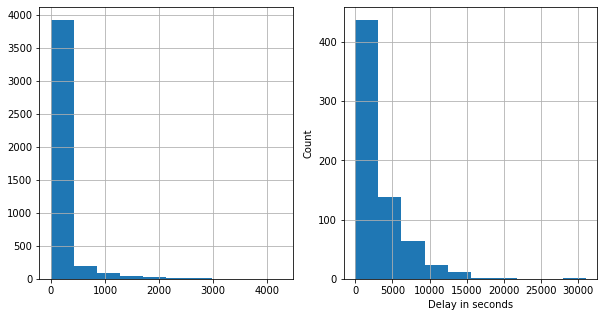

Average delay in seconds for UNDEFINED delays: 123.27190542420028
Average delay in seconds for MAJOR delays: 3322.1165191740415
Average delay in seconds for MODERATE delays: 2330.625


In [662]:
# Get distribution of values of delay_in_seconds that have a magnitude_of_delay of "MAJOR" and "UNDEFINED"
undefined_delay = trainingData[trainingData['magnitude_of_delay'] == 'UNDEFINED']
major_delay = trainingData[trainingData['magnitude_of_delay'] == 'MAJOR']

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
undefined_delay['delay_in_seconds'].hist(ax=axes[0])
major_delay['delay_in_seconds'].hist(ax=axes[1])
plt.xlabel('Delay in seconds')
plt.ylabel('Count')
plt.show()

# Print average delay in seconds for each magnitude of delay
print("Average delay in seconds for UNDEFINED delays: {}".format(undefined_delay['delay_in_seconds'].mean()))
print("Average delay in seconds for MAJOR delays: {}".format(major_delay['delay_in_seconds'].mean()))
print("Average delay in seconds for MODERATE delays: {}".format(trainingData[trainingData['magnitude_of_delay'] == 'MODERATE']['delay_in_seconds'].mean()))


In [663]:
# Count zero values of delay_in_seconds
print("Number of zero values of delay_in_seconds: {}".format(trainingData[trainingData['delay_in_seconds'] == 0].shape[0]))

# Count zero values of delay_in_seconds that have a magnitude_of_delay of "MAJOR" and "UNDEFINED"
print("Number of zero values of delay_in_seconds with magnitude_of_delay = UNDEFINED: {}".format(undefined_delay[undefined_delay['delay_in_seconds'] == 0].shape[0]))
print("Number of zero values of delay_in_seconds with magnitude_of_delay = MAJOR: {}".format(major_delay[major_delay['delay_in_seconds'] == 0].shape[0]))

Number of zero values of delay_in_seconds: 3226
Number of zero values of delay_in_seconds with magnitude_of_delay = UNDEFINED: 3203
Number of zero values of delay_in_seconds with magnitude_of_delay = MAJOR: 23


In [664]:
# Of the 23 incidents that have a magnitude_of_delay of "MAJOR" and a small delay_in_seconds
# Get count of the incidents per type...
major_delay_zero = major_delay[major_delay['delay_in_seconds'] < 250]
print(major_delay_zero['incidents'].value_counts())

Low       32
None       9
Medium     2
Name: incidents, dtype: int64


In [665]:
if 'magnitude_of_delay' in trainingData.columns and 'delay_in_seconds' in testData.columns:
    # Map values no numeric
    dict_magnitude_of_delay = {'UNDEFINED': 1, 'MODERATE':1.5, 'MAJOR':2}
    trainingData['magnitude_of_delay'] = trainingData['magnitude_of_delay'].map(dict_magnitude_of_delay)
    testData['magnitude_of_delay'] = testData['magnitude_of_delay'].map(dict_magnitude_of_delay)
    
    # Multiply the 'delay_in_seconds' column by the 'magnitude_of_delay' column
    #
    # The reason for this is that the 'delay_in_seconds' column has a lot of zero values.
    # The "UNDEFINED" has a delay of 0 seconds in 75% of the cases.
    #  It has 94% of values under 10 minutes.
    #
    trainingData['delay_in_seconds'] = trainingData['delay_in_seconds'] * trainingData['magnitude_of_delay']
    testData['delay_in_seconds'] = testData['delay_in_seconds'] * testData['magnitude_of_delay']
    
    # Drop magnitude_of_delay column
    trainingData.drop('magnitude_of_delay', axis=1, inplace=True)
    testData.drop('magnitude_of_delay', axis=1, inplace=True)
    
    # Rename column as 'delay_coefficient'
    trainingData.rename(columns={'delay_in_seconds': 'delay_coefficient'}, inplace=True)
    testData.rename(columns={'delay_in_seconds': 'delay_coefficient'}, inplace=True)
    
    # Convert delay_coefficient to int
    trainingData['delay_coefficient'] = trainingData['delay_coefficient'].astype(int)
    testData['delay_coefficient'] = testData['delay_coefficient'].astype(int)

In [666]:
# TODO: The 'delay_coefficient' column has a lot of zero values!!
# Also, should we convert to binary delay/no delay? Binning?

#### Luminosity

In [667]:
# Count different values of the 'luminosity' column
trainingData['luminosity'].value_counts()

DARK         2489
LIGHT        2325
LOW_LIGHT     186
Name: luminosity, dtype: int64

None         72
High         52
Very_High    24
Medium       21
Low          17
Name: incidents, dtype: int64


<AxesSubplot:xlabel='luminosity', ylabel='count'>

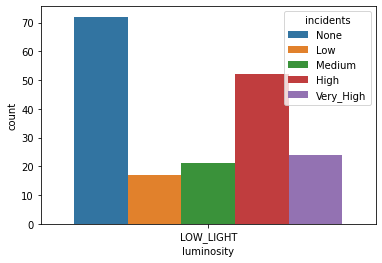

In [668]:
# Relation between 'luminosity' and 'incidents'
low_luminosity = trainingData[trainingData['luminosity'] == 'LOW_LIGHT']
print(low_luminosity['incidents'].value_counts())
sns.countplot(x='luminosity', hue='incidents', data=low_luminosity)

In [669]:
# Count different values of previous plot
low_luminosity['incidents'].value_counts()

# None + Low = 89
# High + Very High = 76
#
# The 'luminosity' column, when it is LOW_LIGHT, has a similar probability of having an incident or not.
# So, whenever we find a LOW_LIGHT value, we will randomly assign a value of 0 or 1.
#
def binary_luminosity(value):
    if value == 'LOW_LIGHT':
        random.seed(2022)
        return random.randint(0, 1)
    elif value == 'DARK':
        return 0
    elif value == 'LIGHT':
        return 1
    else:
        print("ERROR: Invalid value for 'luminosity' column: {}".format(value))


if 'luminosity' in trainingData.columns and trainingData['luminosity'].dtype == 'object':
    trainingData['luminosity'] = trainingData['luminosity'].apply(binary_luminosity)
    testData['luminosity'] = testData['luminosity'].apply(binary_luminosity)

print(trainingData['luminosity'].value_counts())

1    2511
0    2489
Name: luminosity, dtype: int64


#### Average Rain

In [670]:
# Count different values of the 'avg_rain' column.
print(trainingData['avg_rain'].value_counts())

Sem Chuva         4756
chuva fraca        214
chuva moderada      27
chuva forte          3
Name: avg_rain, dtype: int64


None         67
High         50
Very_High    39
Low          32
Medium       26
Name: incidents, dtype: int64


<AxesSubplot:xlabel='avg_rain', ylabel='count'>

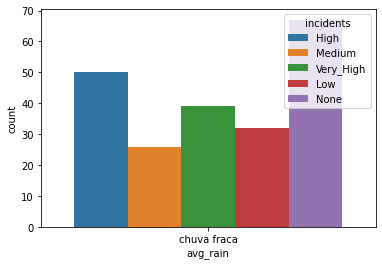

In [671]:
# Get the incidents per value of 'avg_rain'==chuva fraca
chuva_fraca = trainingData[trainingData['avg_rain'] == 'chuva fraca']
print(chuva_fraca['incidents'].value_counts())
sns.countplot(x='avg_rain', hue='incidents', data=chuva_fraca)

In [672]:
# Transform the 'avg_rain' column into binary values: rain/no rain
def binary_rain(value):
    if value == 'Sem Chuva':
        return 0
    else:
        return 1

# Average rain
if 'avg_rain' in trainingData.columns and trainingData['avg_rain'].dtype == 'object':
    trainingData['avg_rain'] = trainingData['avg_rain'].apply(binary_rain)
    testData['avg_rain'] = testData['avg_rain'].apply(binary_rain)

### Handle Non-Categorical Data

#### Average Temperature

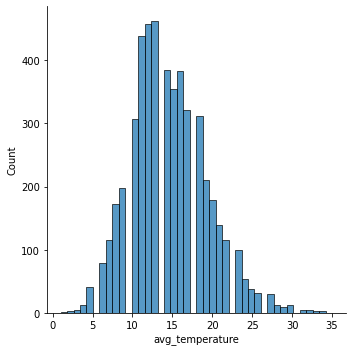

In [683]:
# Distribution of the 'avg_temperature' column
sns.displot(trainingData['avg_temperature'])

#### Average Humidity

#### Average Wind Speed

#### Average Pressure

#### Normalization / Standardization

In [648]:
#categorical_columns = ['delay_coefficient', 'luminosity', 'avg_rain']

# Normalize the categorical columns independently
#for column in categorical_columns:
#    scaler = MinMaxScaler()
#    trainingData[column] = scaler.fit_transform(trainingData[column].values.reshape(-1,1))
#    testData[column] = scaler.transform(testData[column].values.reshape(-1,1))
    
# One-hot encoding
# trainingData = pd.get_dummies(trainingData, columns=columns_to_encode)
# testData = pd.get_dummies(testData, columns=columns_to_encode)

#### Handling the date

In [649]:
# Use the hour and month value as continuous variables
# Create a binary variable for weekend or not
def create_time_variables(data):
    for index, row in data.iterrows():
        # Get the hour
        hour = int(row['record_date'].split(' ')[1].split(':')[0])
        data.at[index, 'hour'] = hour
        
        # Get the month
        date = row['record_date'].split(' ')[0]
        month = int(date.split('-')[1])
        data.at[index, 'month'] = month
        
        # Check if it is a weekend
        # Convert the date to a datetime object
        dateTimeObj = datetime.datetime.strptime(date, "%Y-%m-%d")
        day_of_week_bool = dateTimeObj.isoweekday() in [6, 7]        
        data.at[index, 'weekend'] = int(day_of_week_bool)
    
    # Convert the 'hour', 'month' and weekend columns to int
    data['hour'] = data['hour'].astype(int)
    data['month'] = data['month'].astype(int)
    data['weekend'] = data['weekend'].astype(int)
    
    return data

if 'record_date' in trainingData.columns:
    trainingData = create_time_variables(trainingData)
    testData = create_time_variables(testData)
                
    # Drop record_date
    trainingData.drop('record_date', axis=1, inplace=True)
    testData.drop('record_date', axis=1, inplace=True)

In [650]:
trainingData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   delay_coefficient         5000 non-null   float64
 1   number_of_affected_roads  5000 non-null   int64  
 2   luminosity                5000 non-null   int64  
 3   avg_temperature           5000 non-null   float64
 4   avg_atm_pressure          5000 non-null   float64
 5   avg_humidity              5000 non-null   float64
 6   avg_wind_speed            5000 non-null   float64
 7   avg_rain                  5000 non-null   int64  
 8   incidents                 5000 non-null   object 
 9   hour                      5000 non-null   int64  
 10  month                     5000 non-null   int64  
 11  weekend                   5000 non-null   int64  
dtypes: float64(5), int64(6), object(1)
memory usage: 468.9+ KB


<AxesSubplot:>

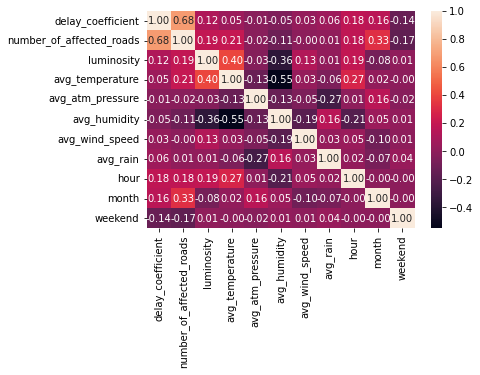

In [576]:
sns.heatmap(trainingData.corr(), annot=True, fmt='.2f')

In [577]:
# Check unique values of the dataset.
print("Unique values of the dataset:")
print(trainingData.nunique())

Unique values of the dataset:
delay_coefficient           1236
number_of_affected_roads       9
luminosity                     2
avg_temperature               35
avg_atm_pressure              36
avg_humidity                  83
avg_wind_speed                11
avg_rain                       2
incidents                      5
hour                          24
month                         11
weekend                        2
dtype: int64


In [578]:
# Get the profile report - later analyze the results
# trainingData.profile_report()

<AxesSubplot:>

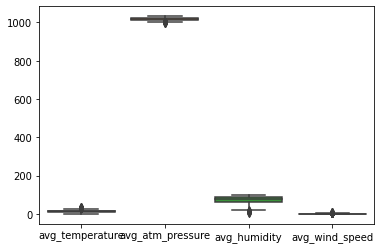

In [579]:
# Visualyze outliers of the dataset: all columns
outliers_columns = [ 'avg_temperature', 'avg_atm_pressure', 'avg_humidity', 'avg_wind_speed']
sns.boxplot(data=trainingData[outliers_columns])

In [580]:
# Describe outliers columns
trainingData[outliers_columns].describe()

,avg_temperature,avg_atm_pressure,avg_humidity,avg_wind_speed
count,5000.000000,5000.000000,5000.000000,5000.000000
mean,14.583000,1018.145000,74.455000,1.253500
std,4.820514,5.174372,17.204638,1.269847
min,1.000000,997.000000,6.000000,0.000000
25%,11.000000,1015.000000,63.000000,0.000000
50%,14.000000,1019.000000,78.000000,1.000000
75%,18.000000,1022.000000,90.000000,2.000000
max,35.000000,1032.000000,100.000000,10.000000


In [581]:
# Count the number of outliers per column with the IQR method; have an option to remove the outliers
def count_outliers_IQR(data, column, remove_outliers=False, verbose=False):
    # Calculate the 1st and 3rd quartile
    q1 = data[column].quantile(0.25)
    q3 = data[column].quantile(0.75)
    # Calculate the IQR
    IQR = q3 - q1
    # Calculate the lower and upper bound
    lower_bound = q1 - (1.5 * IQR)
    upper_bound = q3 + (1.5 * IQR)
    # Count the number of outliers
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    if verbose:
        print("Number of outliers for column {} is {}".format(column, outliers.shape[0]))
    # Remove the outliers
    if remove_outliers:
        number_of_rows_before = data.shape[0]
        data = data[(data[column] > lower_bound) & (data[column] < upper_bound)]
        print("Removed {} rows from the dataset".format(number_of_rows_before - data.shape[0]))
    return data

In [582]:
# Count the number of outliers per column with the Z-score method; have an option to remove the outliers
def count_outliers_Z_score(data, column, remove_outliers=False, verbose=False):
    # Calculate the Z-score
    z = np.abs(stats.zscore(data[column]))
    # Count the number of outliers
    outliers = data[z > 3]
    if verbose:
        print("Number of outliers for column {} is {}".format(column, outliers.shape[0]))
    # Remove the outliers
    if remove_outliers:
        number_of_rows_before = data.shape[0]
        data = data[z < 3]
        print("Removed {} rows from the dataset".format(number_of_rows_before - data.shape[0]))
    return data

In [583]:
# Count and compare the number of outliers per column; do not remove the outliers
for column in outliers_columns:
    trainingData = count_outliers_IQR(trainingData, column, verbose=True)
    trainingData = count_outliers_Z_score(trainingData, column, verbose=True)
    print()

Number of outliers for column avg_temperature is 43
Number of outliers for column avg_temperature is 33

Number of outliers for column avg_atm_pressure is 45
Number of outliers for column avg_atm_pressure is 19

Number of outliers for column avg_humidity is 9
Number of outliers for column avg_humidity is 9

Number of outliers for column avg_wind_speed is 44
Number of outliers for column avg_wind_speed is 44



In [584]:
# Plot a histogram of the outliers columns
# trainingData[outliers_columns].hist(figsize=(10,10))


In [585]:
# Remove the outliers with the IQR method
#for column in outliers_columns:
#    # trainingData = count_outliers_IQR(trainingData, column, remove_outliers=True)
#    trainingData = count_outliers_Z_score(trainingData, column, remove_outliers=True)

# Replace the outliers
#for column in outliers_columns:
#    # Calculate the maximum and minimum values that are not outliers
#    # According to the z-score method
#    max_value = trainingData[column].mean() + 3 * trainingData[column].std()
#    min_value = trainingData[column].mean() - 3 * trainingData[column].std()
#        
#    # Replace the outliers with the maximum and minimum values
#    trainingData.loc[trainingData[column] > max_value, column] = max_value
#    trainingData.loc[trainingData[column] < min_value, column] = min_value


## 5. Models Training

In [586]:
""" Save results to a file. """
def saveResults ( results, path ):
    file = open(path, 'w')
    file.write ("RowId,Incidents\n")
    i = 1
    for result in results :
        file.write (str(i) + "," + result + "\n")
        i += 1

In [587]:
# run for test or run for submission
results_to_test = True

# split data into train and test
trainData = trainingData.copy()
ttData = testData.copy()

if results_to_test:
    y = trainData['incidents']
    x = trainData.drop(['incidents'], axis=1)
    x_training, x_testing, y_training, y_testing = model_selection.train_test_split(x, y, test_size=0.5, random_state=2022)

else :
    # TODO: UPDATE
    x_testing = ttData.copy()
    y_training = trainData['incidents'] 
    x_training = trainData.drop(['record_date','incidents','number_affected_roads'], axis=1)


### 5.1 Árvores de Decisão e Classificação

In [588]:
dtc = tree.DecisionTreeClassifier(random_state=2022, criterion="gini", max_depth=10)
dtc.fit(x_training,y_training)
decision_trees_predictions = dtc.predict(x_testing)
if results_to_test:
    print("Decision Trees Accuracy: ", metrics.accuracy_score(y_testing, decision_trees_predictions))

Decision Trees Accuracy:  0.8292


### 5.2 RandomForestClassifier

In [589]:
# Random Forest Classifier tunning

#model = RandomForestClassifier(random_state=2022)
#
#param_grid = {
#    'n_estimators': [500, 750, 1000],
#    'max_depth': [15, 25, 35],
#    'min_samples_split': [2, 5, 10],
#    'min_samples_leaf': [1, 2, 5]
#}
#
## change cv later? use square root of dataset size ?
#grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, verbose=3)
#grid_search.fit(x_training, y_training)
#print(grid_search.best_params_)
#print(grid_search.best_score_)
#
random_forest = RandomForestClassifier(n_estimators=100, random_state=2022)
random_forest.fit(x_training, y_training)
random_forest_predictions = random_forest.predict(x_testing)

# print accuracy
if results_to_test:
    print("Random Forest Classifier Accuracy: ", metrics.accuracy_score(y_testing, random_forest_predictions))

Random Forest Classifier Accuracy:  0.8444


### 5.3 Neural Network

In [590]:
#

## 6. Model Evaluation

In [591]:
if results_to_test:

    results = []
    results_table = []

    # 5.1 Decision Tree
    decision_trees_classification = metrics.classification_report(y_testing, decision_trees_predictions, zero_division=0)
    decision_trees_classification_dict = metrics.classification_report(y_testing, decision_trees_predictions, output_dict=True, zero_division=0)
    results_table.append({'model': 'Decision Tree', 'table': decision_trees_classification})
    results.append({
        'model': 'Decision Tree',
        'accuracy': decision_trees_classification_dict['accuracy'],
        'precision': decision_trees_classification_dict['macro avg']['precision'],
        'recall': decision_trees_classification_dict['macro avg']['recall'],
        'f1-score': decision_trees_classification_dict['macro avg']['f1-score']
        })

    # 5.2 Random Forest
    random_forest_classification = metrics.classification_report(y_testing, random_forest_predictions, zero_division=0)
    random_forest_classification_dict = metrics.classification_report(y_testing, random_forest_predictions, output_dict=True, zero_division=0)
    results_table.append({'model': 'Random Forest', 'table': random_forest_classification})
    results.append({
        'model': 'Random Forest',
        'accuracy': random_forest_classification_dict['accuracy'],
        'precision': random_forest_classification_dict['macro avg']['precision'],
        'recall': random_forest_classification_dict['macro avg']['recall'],
        'f1-score': random_forest_classification_dict['macro avg']['f1-score']
        })

    # 5.3 Neural Network
    
    
else:
    saveResults(decision_trees_predictions, 'results/classificationDecisionTree.csv')
    saveResults(random_forest_predictions, 'results/RandomForest.csv')

In [592]:
for result in results_table:
    print("----------" + result['model'] + "----------------------------------------------------------------")
    print(result['table'])

----------Decision Tree----------------------------------------------------------------
              precision    recall  f1-score   support

        High       0.73      0.77      0.75       544
         Low       0.77      0.78      0.78       363
      Medium       0.72      0.64      0.68       282
        None       0.94      0.94      0.94      1014
   Very_High       0.79      0.79      0.79       297

    accuracy                           0.83      2500
   macro avg       0.79      0.78      0.79      2500
weighted avg       0.83      0.83      0.83      2500

----------Random Forest----------------------------------------------------------------
              precision    recall  f1-score   support

        High       0.78      0.82      0.80       544
         Low       0.76      0.75      0.76       363
      Medium       0.78      0.60      0.68       282
        None       0.93      0.95      0.94      1014
   Very_High       0.83      0.86      0.84       297

    accur

In [593]:
results_plot = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])
for row in results:
    results_plot = results_plot.append({
        'Model': row['model'],
        'Accuracy': row['accuracy'],
        'Precision': row['precision'],
        'Recall': row['recall'],
        'F1-Score': row['f1-score']
        }, ignore_index=True)

Text(0, 0.5, 'Accuracy')

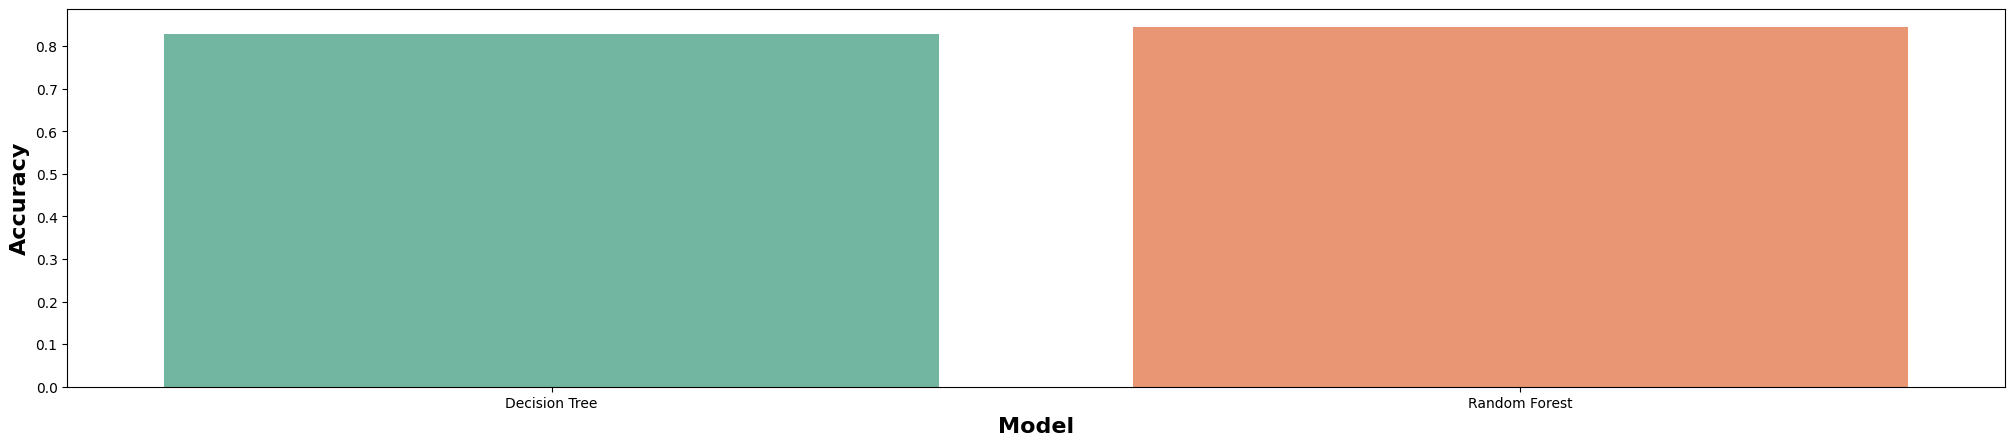

In [594]:
fig, ax = plt.subplots(figsize=(25, 5), dpi=100)
sns.barplot(x=results_plot['Model'] , y=results_plot['Accuracy'], ax=ax, palette='Set2')
ax.set_xlabel('Model', fontdict={'color':'black', 'weight':'bold', 'size': 16})
ax.set_ylabel('Accuracy', fontdict={'color':'black', 'weight':'bold', 'size': 16})

Text(0, 0.5, 'Precision')

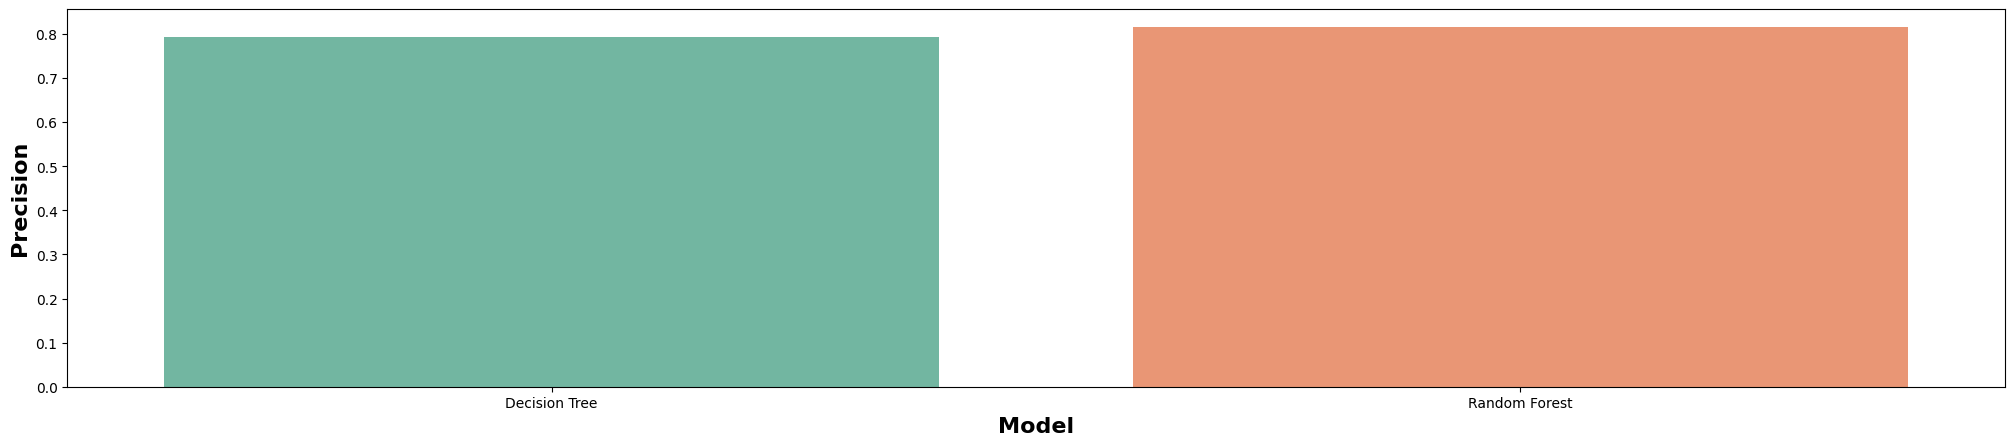

In [595]:
fig, ax = plt.subplots(figsize=(25, 5), dpi=100)
sns.barplot(x=results_plot['Model'] , y=results_plot['Precision'], ax=ax, palette='Set2')
ax.set_xlabel('Model', fontdict={'color':'black', 'weight':'bold', 'size': 16})
ax.set_ylabel('Precision', fontdict={'color':'black', 'weight':'bold', 'size': 16})

Text(0, 0.5, 'Recall')

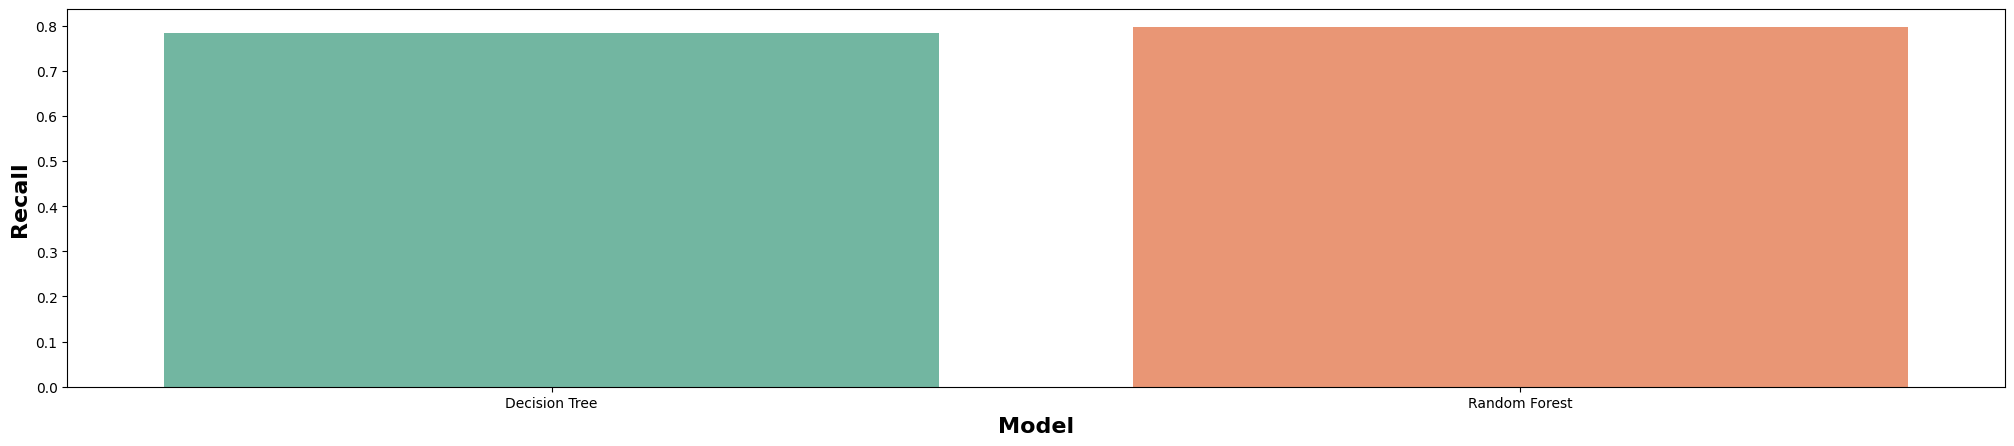

In [596]:
fig, ax = plt.subplots(figsize=(25, 5), dpi=100)
sns.barplot(x=results_plot['Model'] , y=results_plot['Recall'], ax=ax, palette='Set2')
ax.set_xlabel('Model', fontdict={'color':'black', 'weight':'bold', 'size': 16})
ax.set_ylabel('Recall', fontdict={'color':'black', 'weight':'bold', 'size': 16})

Text(0, 0.5, 'F1-Score')

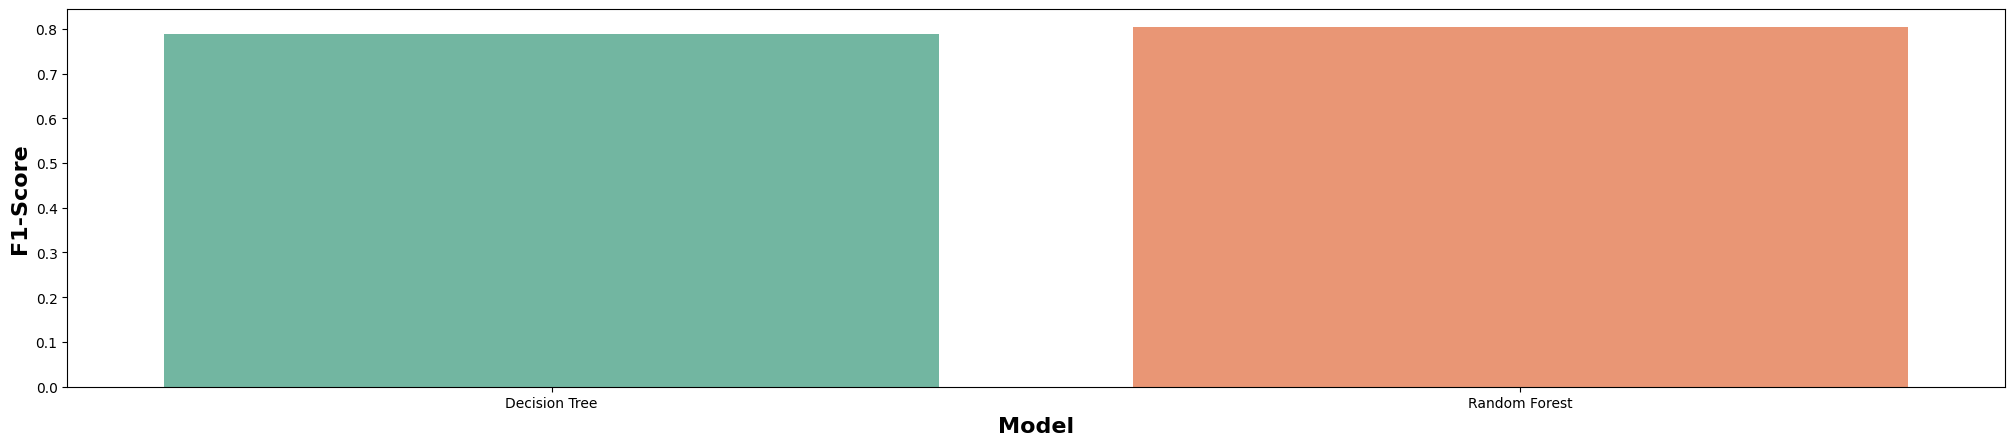

In [597]:
fig, ax = plt.subplots(figsize=(25, 5), dpi=100)
sns.barplot(x=results_plot['Model'] , y=results_plot['F1-Score'], ax=ax, palette='Set2')
ax.set_xlabel('Model', fontdict={'color':'black', 'weight':'bold', 'size': 16})
ax.set_ylabel('F1-Score', fontdict={'color':'black', 'weight':'bold', 'size': 16})